In [1]:
#Descriptive: What is happening? 
#Diagnostic: Why is it happening?

import numpy as np
import pandas as pd

In [2]:
#load data from csv file

url = "C:/Users/uamarh1/Documents/diabetes.csv"
FeatureSet = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','class']
dataset=pd.read_csv(url,names=FeatureSet)
dataset.head(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class


In [3]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Shape of the dataset: " + str(dataset.shape))
dataset.groupby('class').size()

Shape of the dataset: (768, 9)


class
0    500
1    268
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
class                       0
dtype: int64

In [14]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
class                       0
dtype: int64

In [15]:
dataset = dataset.replace(0, np.nan)

In [16]:
dataset.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
class                       500
dtype: int64

In [17]:
#Above analysis provide that SkinThickness and Insulin has got 0 values respectivly 227 and 374 so we have to 
#ignore the both columns due to 0 values

dataset = dataset.replace(np.nan, 0)

In [18]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
class                       0
dtype: int64

In [19]:
#Select only the useful features

useful_FeatureSet = ['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age','class']
dataset_use = dataset[useful_FeatureSet]

dataset_use.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,class
0,6.0,148.0,72.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,43.1,2.288,33,1.0


In [23]:
dataset_use['BMI'] = dataset_use['BMI'].replace(0,dataset_use['BMI'].median())
dataset_use['BloodPressure'] = dataset_use['BloodPressure'].replace(0,dataset_use['BloodPressure'].median())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
import matplotlib.pyplot as plt
# Correlation matrix
correlation = dataset_use.corr()
correlation

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,class
Pregnancies,1.000000,0.129459,0.208615,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.217870,0.218806,0.137337,0.263514,0.466581
BloodPressure,0.208615,0.217870,1.000000,0.281132,-0.002378,0.324915,0.165723
BMI,0.021546,0.218806,0.281132,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002378,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324915,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.165723,0.312249,0.173844,0.238356,1.000000


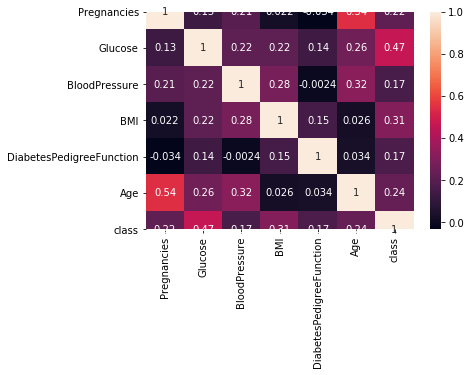

In [28]:
import seaborn as sns
sns.heatmap(correlation,annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5D790E188>,
      dtype=object)

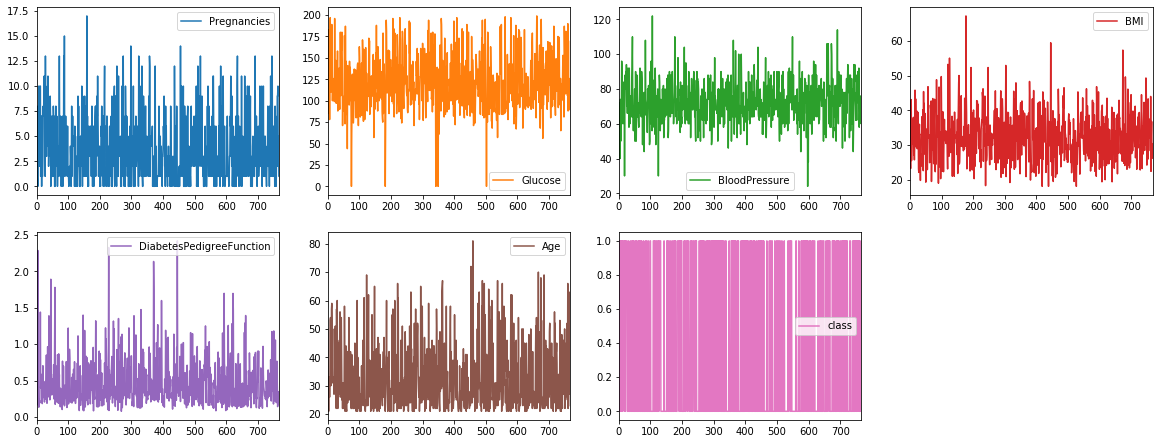

In [29]:
dataset_use.plot(kind='line', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(20,20))

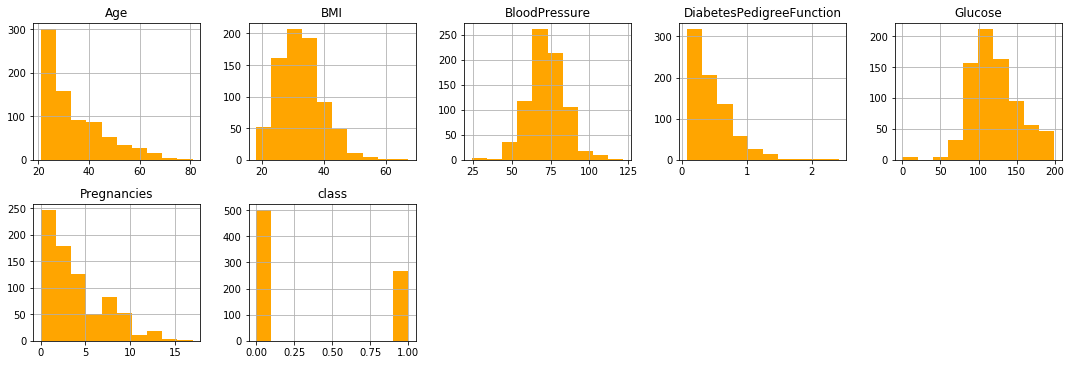

In [30]:
dataset_use.hist(figsize=(15,15), layout=(6,5), color='Orange')
plt.tight_layout()
plt.show()
